### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Importing the Boston House Price Dataset

In [2]:
house_price_dataset = sklearn.datasets.load_boston()
print(house_price_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [3]:
# Loading the dataset to a Pandas DataFrame
df = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# add the target (price) column to the DataFrame
df['price'] = house_price_dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# checking the number of rows and Columns in the data frame
df.shape

(506, 14)

In [6]:
# statistical measures of the dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# check for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

#### Understanding the correlation between various features in the dataset

In [8]:
correlation = df.corr()

<AxesSubplot:>

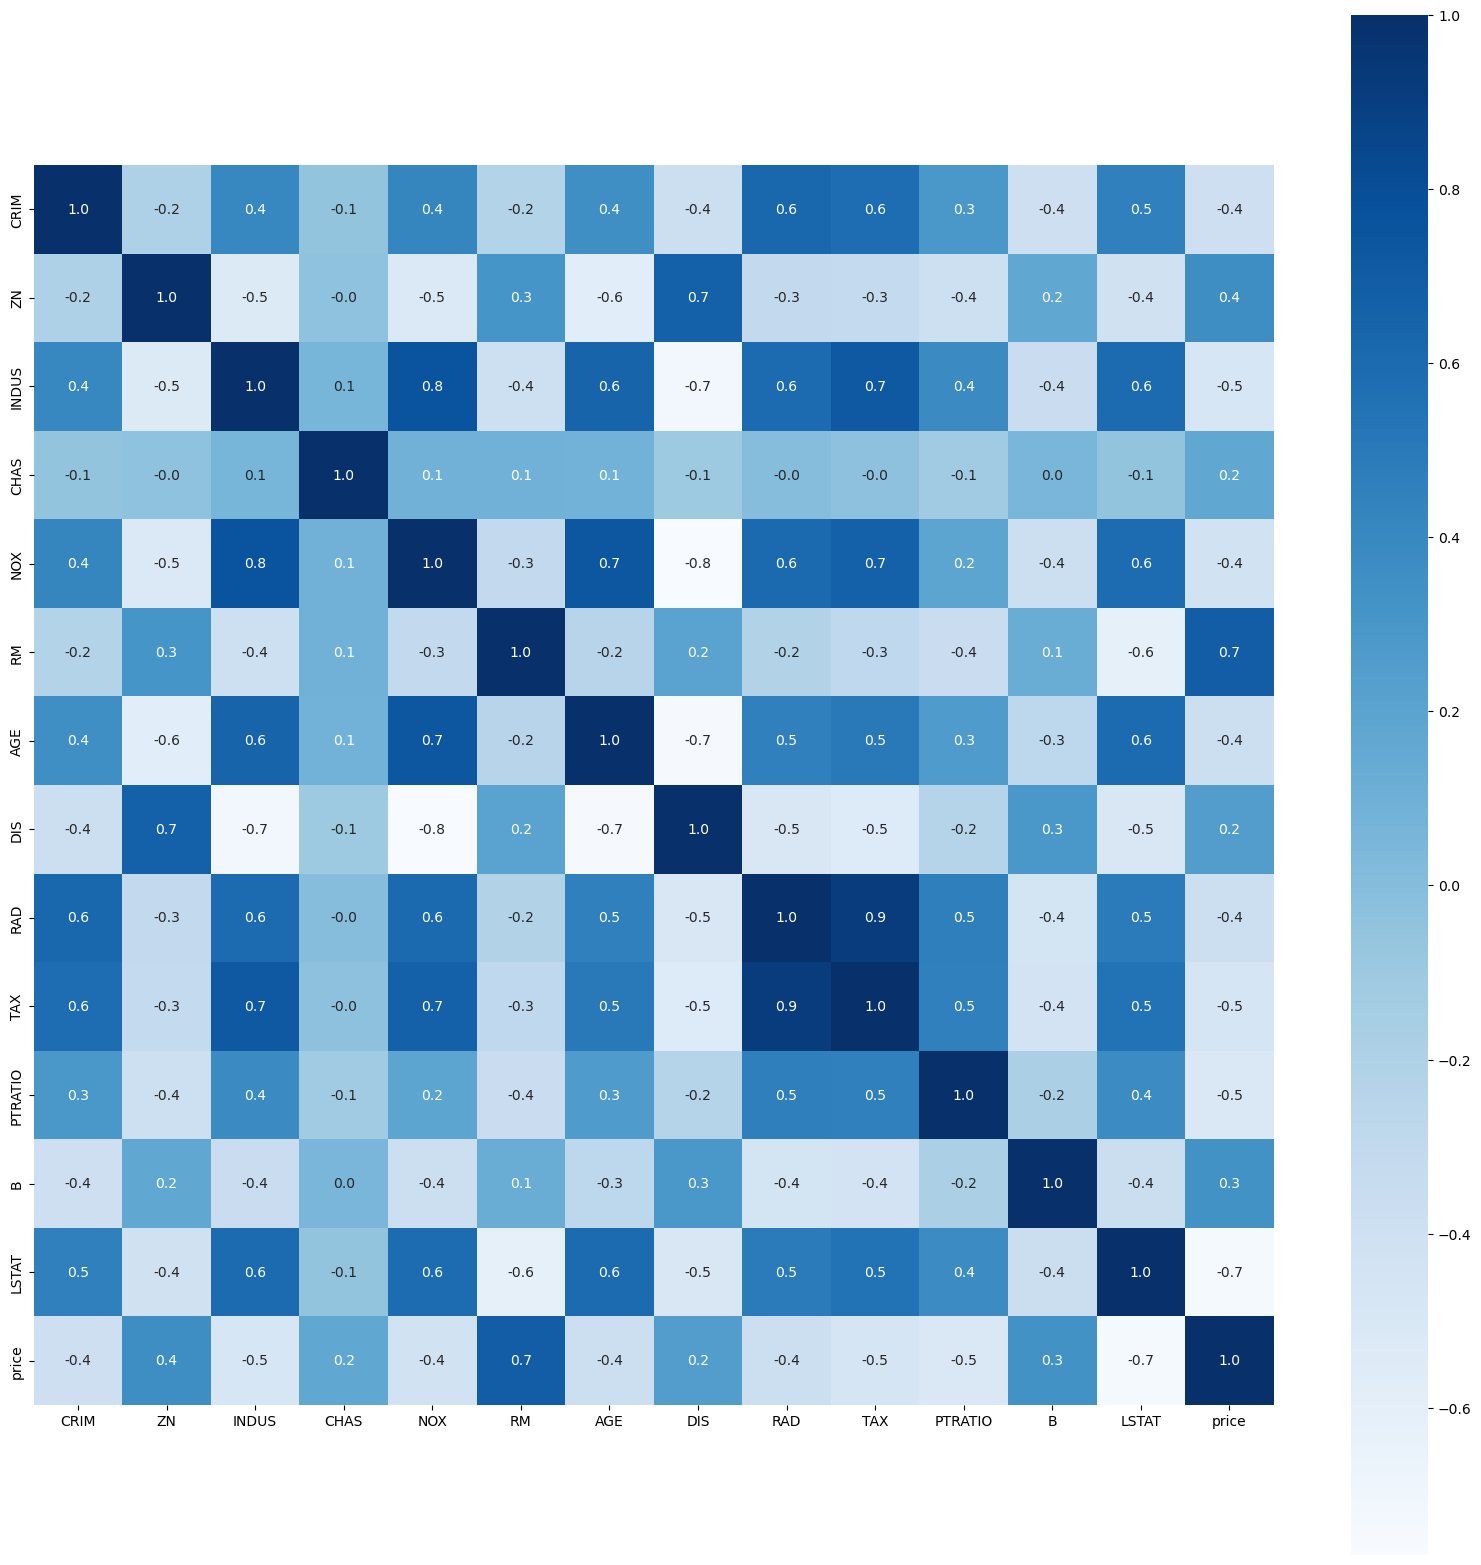

In [9]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

<AxesSubplot:xlabel='price', ylabel='Density'>

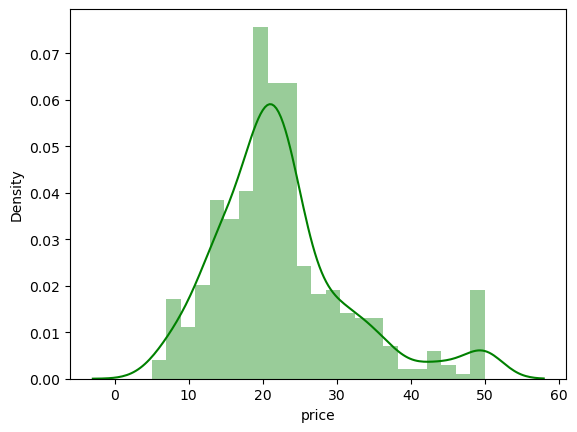

In [10]:
# checking the distribution of the price
sns.distplot(df['price'],color='green')

In [11]:
# correlation values of price
print(correlation['price'])

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
price      1.000000
Name: price, dtype: float64


#### Splitting the data and target

In [12]:
# Split the train dataset into features and target variable
X = df.drop('price', axis=1)
Y = df['price']
print(X.shape, Y.shape)

(506, 13) (506,)


#### Standardising the data

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# here we just need to standardise the train data, no need to do this on target

In [14]:
# Split the train dataset into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=18)
print("X_train : ", X_train.shape)
print("Y_train : ", Y_train.shape)
print("X_test : ", X_test.shape)
print("Y_test : ", Y_test.shape)

X_train :  (404, 13)
Y_train :  (404,)
X_test :  (102, 13)
Y_test :  (102,)


### Model Training (Linear Regression)

In [15]:
# loading the model
regressor = LinearRegression()

In [16]:
# training the model with X_train
lr = regressor.fit(X_train,Y_train)

In [17]:
# Predict the target variable for the validation set
lr_prd_train = lr.predict(X_train)

In [18]:
# Model Evaluation
# R squared error
score_1 = metrics.r2_score(Y_train, lr_prd_train)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, lr_prd_train)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.7485458634886819
Mean Absolute Error :  3.252069026417801


In [19]:
# Predict the target variable for the test set
lr_prd_test = lr.predict(X_test)

In [20]:
# Model Evaluation
# R squared error
score_1 = metrics.r2_score(Y_test, lr_prd_test)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, lr_prd_test)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.6904848317230247
Mean Absolute Error :  3.6266845083593884


#### This means that, on average, the MAE is 3.62 away from the predicted value.
#### R-squared of 0.69 shows a good level of correlation

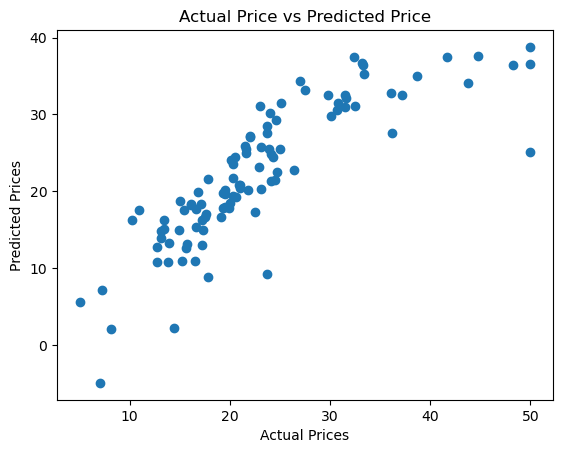

In [21]:
# Visualizing the actual Prices and predicted prices

plt.scatter(Y_test, lr_prd_test)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

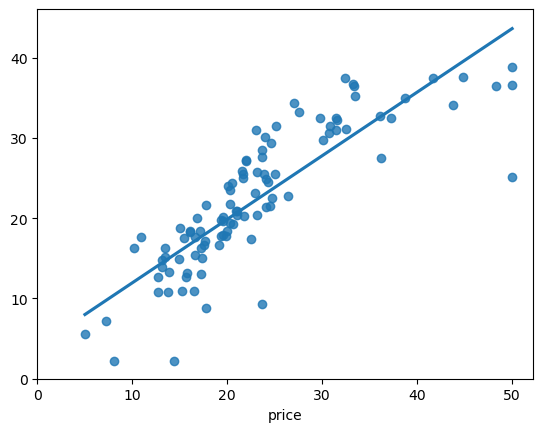

In [22]:
# Plotting a line for best fit
sns.regplot(Y_test, lr_prd_test, ci=None)
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.show()

### Model Training (Random Forest)

In [23]:
# loading the model
rf = RandomForestRegressor()

In [24]:
# training the model with X_train & Y_train
rfr = rf.fit(X_train,Y_train)

In [25]:
# Predict the target variable for the validation set
rfr_prd_train = rf.predict(X_train)

In [26]:
# Model Evaluation
# R squared error
score_1 = metrics.r2_score(Y_train, rfr_prd_train)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, rfr_prd_train)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9790215220969043
Mean Absolute Error :  0.8722896039603963


In [27]:
# Predict the target variable for the test set
rfr_prd_test = rf.predict(X_test)

In [28]:
# Model Evaluation
# R squared error
score_1 = metrics.r2_score(Y_test, rfr_prd_test)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, rfr_prd_test)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9008929248654141
Mean Absolute Error :  2.164725490196078


#### This means that, on average, the MAE is 2.19 away from the predicted value.
#### R-squared of 0.89 shows a high level of correlation

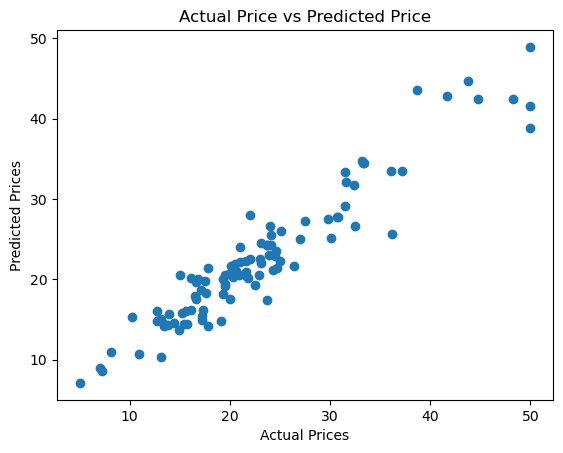

In [29]:
# Visualizing the actual Prices and predicted prices

plt.scatter(Y_test, rfr_prd_test)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

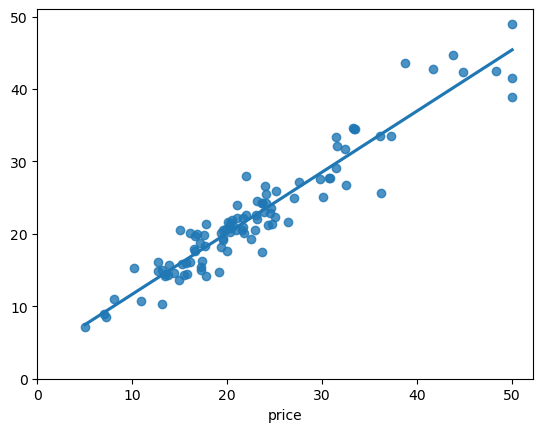

In [30]:
# Plotting a line for best fit
sns.regplot(Y_test, rfr_prd_test, ci=None)
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.show()